**Sección 1 — Pregunta 1: Carga del dataset con KaggleHub**

In [7]:
# !pip -q install kagglehub

import kagglehub
import os
import pandas as pd

# Descarga el dataset
path = kagglehub.dataset_download("crowdflower/twitter-user-gender-classification")
print("Path to dataset files:", path)

# Ver archivos disponibles
print("Files:", os.listdir(path))

# Cargar el CSV
csv_files = [f for f in os.listdir(path) if f.lower().endswith(".csv")]
print("CSV encontrados:", csv_files)

csv_path = os.path.join(path, csv_files[0])
df = pd.read_csv(csv_path, encoding="latin1")

print("Archivo cargado:", csv_path)
print("Shape:", df.shape)
display(df.head(3))

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\crowdflower\twitter-user-gender-classification\versions\1
Files: ['gender-classifier-DFE-791531.csv']
CSV encontrados: ['gender-classifier-DFE-791531.csv']
Archivo cargado: C:\Users\user\.cache\kagglehub\datasets\crowdflower\twitter-user-gender-classification\versions\1\gender-classifier-DFE-791531.csv
Shape: (20050, 26)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [8]:
# Tipos de columnas
display(df.dtypes)

# Nulos (top 15)
nulls = (df.isna().mean()*100).sort_values(ascending=False)
display(nulls.head(15).to_frame("% nulos"))

# Target: gender
display(df["gender"].value_counts(dropna=False).to_frame("conteo"))
display((df["gender"].value_counts(normalize=True, dropna=False)*100).round(2).to_frame("%"))

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

,% nulos
profile_yn_gold,99.750623
gender_gold,99.750623
tweet_coord,99.206983
user_timezone,38.892768
tweet_location,37.331671
description,18.673317
gender,0.483791
_last_judgment_at,0.249377
gender:confidence,0.129676
_unit_id,0.000000


,conteo
gender,
female,6700
male,6194
brand,5942
unknown,1117
NaN,97


,%
gender,
female,33.42
male,30.89
brand,29.64
unknown,5.57
NaN,0.48


**Sección 2 — Pregunta 2: Análisis gráfico (distribución de gender + correlaciones entre variables numéricas)**

2.1 Distribución de la variable objetivo (gender)

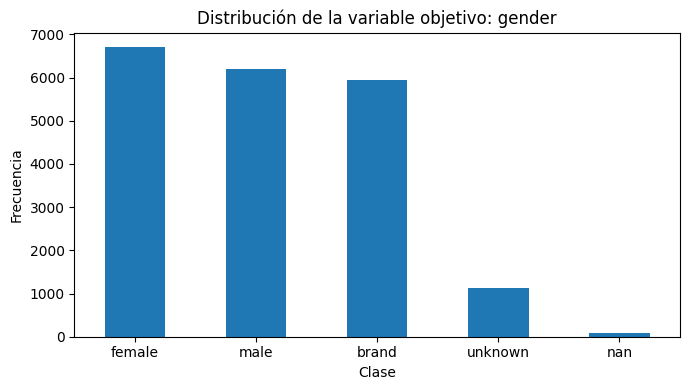

,conteo
gender,
female,6700
male,6194
brand,5942
unknown,1117
NaN,97


,%
gender,
female,33.42
male,30.89
brand,29.64
unknown,5.57
NaN,0.48


In [9]:
import matplotlib.pyplot as plt

# Copia para no tocar df original
df_eda = df.copy()

# Conteos (incluye NaN)
gender_counts = df_eda["gender"].value_counts(dropna=False)

plt.figure(figsize=(7,4))
gender_counts.plot(kind="bar")
plt.title("Distribución de la variable objetivo: gender")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Tabla resumen
display(gender_counts.to_frame("conteo"))
display((gender_counts / len(df_eda) * 100).round(2).to_frame("%"))

2.2 Correlaciones (solo numéricas)

Columnas numéricas/bool: ['_unit_id', '_golden', '_trusted_judgments', 'gender:confidence', 'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count', 'tweet_id']


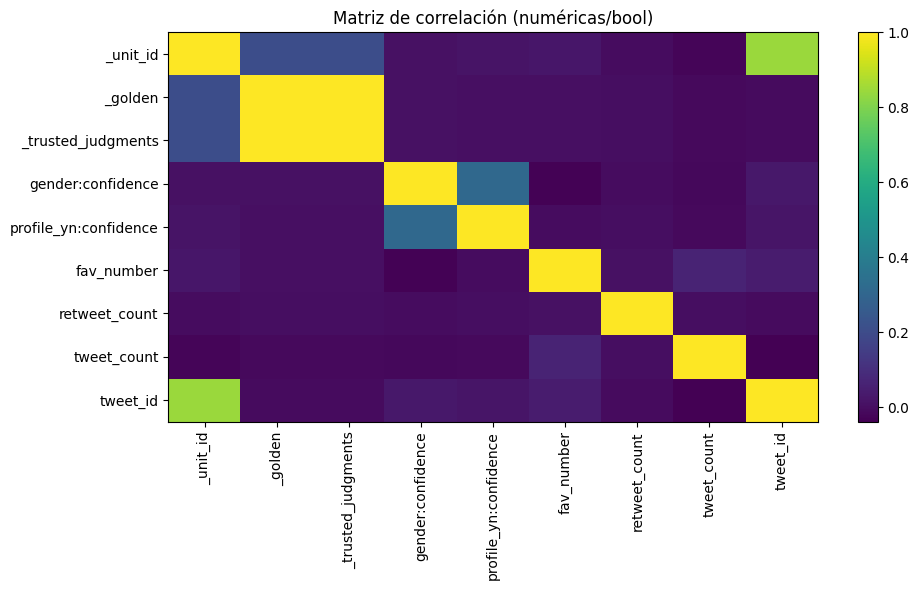

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


In [10]:
import numpy as np

num_cols = df_eda.select_dtypes(include=[np.number, "bool"]).columns
print("Columnas numéricas/bool:", list(num_cols))

corr = df_eda[num_cols].corr(numeric_only=True)

plt.figure(figsize=(10,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de correlación (numéricas/bool)")
plt.tight_layout()
plt.show()

display(corr)

**Sección 3 — Pregunta 3: Selección de variables + limpieza**

3.1 Definir columnas a eliminar (texto, IDs y columnas “gold”)

In [11]:
# ============================================
# 3.1) Drop de columnas NO utilizables / no útiles
# ============================================

df3 = df.copy()

# (A) Columnas tipo ID / timestamps (no aportan y pueden sesgar)
drop_id_time = [
    "_unit_id", "tweet_id",
    "_last_judgment_at", "created", "tweet_created"
]

# (B) Columnas de texto libre / casi texto (NO PLN)
drop_text = [
    "description", "text", "name", "profileimage",
    "tweet_location", "user_timezone", "tweet_coord",
    "link_color", "sidebar_color"
]

# (C) Columnas "gold" o de referencia/etiquetado (no deberían usarse como feature)
drop_gold = [
    "gender_gold", "profile_yn_gold"
]

# (D) Redundancia fuerte detectada en correlación
# _golden y _trusted_judgments ~1.0. Nos quedamos solo con _trusted_judgments.
drop_redundant = ["_golden"]

# Unimos y eliminamos solo las que existan
to_drop = [c for c in (drop_id_time + drop_text + drop_gold + drop_redundant) if c in df3.columns]
print("Columnas a eliminar:", to_drop)

df3 = df3.drop(columns=to_drop)
print("Shape luego de drop:", df3.shape)

display(df3.head(3))

Columnas a eliminar: ['_unit_id', 'tweet_id', '_last_judgment_at', 'created', 'tweet_created', 'description', 'text', 'name', 'profileimage', 'tweet_location', 'user_timezone', 'tweet_coord', 'link_color', 'sidebar_color', 'gender_gold', 'profile_yn_gold', '_golden']
Shape luego de drop: (20050, 9)


,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,fav_number,retweet_count,tweet_count
0,finalized,3,male,1.0000,yes,1.0,0,0,110964
1,finalized,3,male,1.0000,yes,1.0,68,0,7471
2,finalized,3,male,0.6625,yes,1.0,7696,1,5617


3.2 Limpiar la variable objetivo (gender)

*Opción 1: Clasificación binaria (female vs male)*

En el taller se consideraron dos formas de abordar la variable objetivo: gender. A continuación se explica de qué trata la primera opción con su respectivo código:
La Opción 1 (binaria) consiste en clasificar únicamente entre female y male, lo cual simplifica el diseño de la salida del modelo (una sola neurona con activación sigmoide) y facilita el análisis de métricas y matriz de confusión, pero implica descartar las clases brand y unknown. Se escogió esta opción dado que es la arquitectura que se pide en el taller.

In [12]:
# ============================================
# 3.2) Target binario: female vs male
# ============================================

df_bin = df3[df3["gender"].isin(["female", "male"])].copy()
df_bin["y"] = (df_bin["gender"] == "female").astype(int)
df_bin = df_bin.drop(columns=["gender"])

print("Shape binario:", df_bin.shape)
print("Distribución y:")
display(df_bin["y"].value_counts().to_frame("conteo"))
display((df_bin["y"].value_counts(normalize=True)*100).round(2).to_frame("%"))

Shape binario: (12894, 9)
Distribución y:


,conteo
y,
1,6700
0,6194


,%
y,
1,51.96
0,48.04


*Opción 2: Multiclase (female, male, brand, unknown)*

La Opción 2 (multiclase) mantiene la variable gender con sus clases reales (female, male, brand, unknown), usando una capa de salida con softmax y permitiendo evaluar el desempeño del modelo en un escenario más completo.

In [13]:
# ============================================
# 3.2) Target multiclase: female/male/brand/unknown
# ============================================

#df_multi = df3[df3["gender"].isin(["female", "male", "brand", "unknown"])].copy()
#df_multi = df_multi.dropna(subset=["gender"]).copy()

# Codificación a enteros
#class_map = {c:i for i,c in enumerate(sorted(df_multi["gender"].unique()))}
#df_multi["y"] = df_multi["gender"].map(class_map).astype(int)
#df_multi = df_multi.drop(columns=["gender"])

#print("Mapa clases:", class_map)
#print("Shape multiclase:", df_multi.shape)
#display(df_multi["y"].value_counts().to_frame("conteo"))

**Sección 4 — Pregunta 4 y 5: Transformación de variables (categóricas) + escalado numérico + partición train/val/test**

4.1 Separar X e y, identificar columnas numéricas y categóricas

In [14]:
# ============================================
# 4.1) Separar X, y + identificar tipos de columnas
# ============================================

from sklearn.model_selection import train_test_split

X = df_bin.drop(columns=["y"]).copy()
y = df_bin["y"].copy()

cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Shape X:", X.shape, "| Shape y:", y.shape)
print("Num cols:", len(num_cols), num_cols)
print("Cat cols:", len(cat_cols), cat_cols)

display(X.head(3))

Shape X: (12894, 8) | Shape y: (12894,)
Num cols: 6 ['_trusted_judgments', 'gender:confidence', 'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count']
Cat cols: 2 ['_unit_state', 'profile_yn']


,_unit_state,_trusted_judgments,gender:confidence,profile_yn,profile_yn:confidence,fav_number,retweet_count,tweet_count
0,finalized,3,1.0000,yes,1.0,0,0,110964
1,finalized,3,1.0000,yes,1.0,68,0,7471
2,finalized,3,0.6625,yes,1.0,7696,1,5617


4.2 Partición train/val/test estratificada (60/20/20)

In [15]:
# ============================================
# 4.2) Split: train/val/test (60/20/20) estratificado
# ============================================

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

def show_dist(name, yy):
    vc = yy.value_counts(normalize=True).sort_index() * 100
    print(f"{name} (%):", vc.round(2).to_dict())

show_dist("Train", y_train)
show_dist("Val", y_val)
show_dist("Test", y_test)

Train: (7736, 8) (7736,)
Val:   (2579, 8) (2579,)
Test:  (2579, 8) (2579,)
Train (%): {0: 48.04, 1: 51.96}
Val (%): {0: 48.04, 1: 51.96}
Test (%): {0: 48.04, 1: 51.96}


4.3 Preprocesamiento: imputación + OneHot (categóricas) + StandardScaler (numéricas)

In [16]:
# ============================================
# 4.3) Preprocesamiento: imputar + escalar + one-hot
# ============================================

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# Fit SOLO con train (evita data leakage)
preprocessor.fit(X_train)

X_train_p = preprocessor.transform(X_train)
X_val_p   = preprocessor.transform(X_val)
X_test_p  = preprocessor.transform(X_test)

print("Dimensión tras preprocessing:")
print("X_train_p:", X_train_p.shape)
print("X_val_p:  ", X_val_p.shape)
print("X_test_p: ", X_test_p.shape)

Dimensión tras preprocessing:
X_train_p: (7736, 9)
X_val_p:   (2579, 9)
X_test_p:  (2579, 9)


4.4 Guardar matrices listas

In [17]:
# ============================================
# 4.4) Guardar matrices (opcional pero recomendado)
# ============================================

import joblib
import numpy as np

joblib.dump(preprocessor, "preprocessor.joblib")

def to_dense(a):
    return a.toarray() if hasattr(a, "toarray") else a

np.save("X_train.npy", to_dense(X_train_p))
np.save("X_val.npy",   to_dense(X_val_p))
np.save("X_test.npy",  to_dense(X_test_p))

np.save("y_train.npy", y_train.to_numpy())
np.save("y_val.npy",   y_val.to_numpy())
np.save("y_test.npy",  y_test.to_numpy())

print("Archivos guardados: preprocessor.joblib + X/y .npy")

Archivos guardados: preprocessor.joblib + X/y .npy


Sección 6 - Preparar y para modelos en Keras: y en One-Hot (LO DEJO PLANTEADO Y SI LES PARECE LO DEJAMOS)

In [19]:
# =========================================================
# 6) (OPCIONAL) One-Hot del target para MLP multiclase
# =========================================================
# Nota: En multiclase con Keras/TF, lo usual es:
# - Capa de salida con 4 neuronas + activación softmax
# - Pérdida categorical_crossentropy
# - Por eso se suele convertir y a one-hot.
#
# Si se decide usar sparse_categorical_crossentropy,
# NO es necesario hacer one-hot (se puede dejar y como enteros).

import tensorflow as tf

n_classes = 4  # brand/female/male/unknown

y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val_oh   = tf.keras.utils.to_categorical(y_val,   num_classes=n_classes)
y_test_oh  = tf.keras.utils.to_categorical(y_test,  num_classes=n_classes)

print("y_train_oh:", y_train_oh.shape)
print("y_val_oh:  ", y_val_oh.shape)
print("y_test_oh: ", y_test_oh.shape)

ModuleNotFoundError: No module named 'tensorflow'

- Si decidimos usar categorical_crossentropy → usamos y_*_oh (one-hot).
- Si decidimos usar sparse_categorical_crossentropy → dejamos y_* como enteros (más simple y equivalente).

Respecto a lo anterior le pregunté a Claude (ultimamente confío más que en chat gpt) y me dijo esto: Yo recomendaría usar sparse_categorical_crossentropy y dejar y como enteros — es más limpio y evita este paso extra. Pero si el equipo ya decidió usar categorical_crossentropy, entonces este bloque es necesario.